In [1]:
# Import library and data sets

import altair as alt

from vega_datasets import data

In [2]:
# Review the cars data set

cars = data.cars()

# display the head of the cars dataset

cars.head()

Acceleration  Cylinders  Displacement  Horsepower  Miles_per_Gallon  \
0          12.0          8         307.0       130.0              18.0   
1          11.5          8         350.0       165.0              15.0   
2          11.0          8         318.0       150.0              18.0   
3          12.0          8         304.0       150.0              16.0   
4          10.5          8         302.0       140.0              17.0   

                        Name Origin  Weight_in_lbs       Year  
0  chevrolet chevelle malibu    USA           3504 1970-01-01  
1          buick skylark 320    USA           3693 1970-01-01  
2         plymouth satellite    USA           3436 1970-01-01  
3              amc rebel sst    USA           3433 1970-01-01  
4                ford torino    USA           3449 1970-01-01

### Data Exploration with Altair

In [3]:
# Generate a mark point with altair

# alt -> the object to create the visualization
# Charts -> the method to display a set of data
# cars -> the set of data to display 
# mark_point -> the type of point to display the data as -> the example below is 400 pts. of data on top of one another

alt.Chart(cars).mark_point()

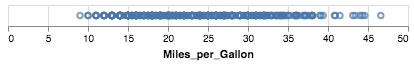

In [4]:
# Use encoding to map visual elements of the chart (i.e. x axis, etc.)

alt.Chart(cars).mark_point().encode(
    x = 'Miles_per_Gallon'
)

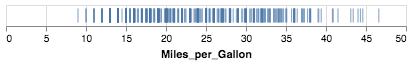

In [5]:
# Use encoding to map visual elements of the chart (i.e. x axis, etc.) with tick mark instead

alt.Chart(cars).mark_tick().encode(
    x = 'Miles_per_Gallon'
)

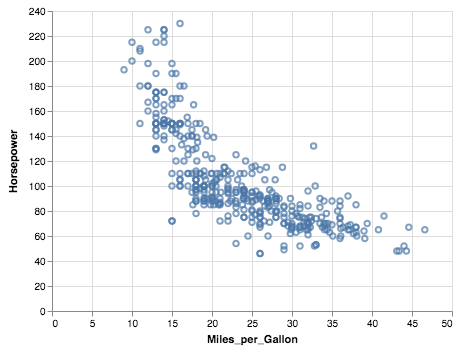

In [6]:
# Use encoding to map visual elements of the chart (i.e. x axis, y axis, etc.)

alt.Chart(cars).mark_point().encode(
    x = 'Miles_per_Gallon',
    y = 'Horsepower'
).interactive()

In [7]:
# Use the .to_dict() method to display the vega-lite json object
# This produces a long result

# alt.Chart(cars).mark_point().encode(
#     x = 'Miles_per_Gallon',
#     y = 'Horsepower'
# ).interactive().to_dict()

In [8]:
# Use the .to_dict() method to display the vega-lite json object

cars1 = cars.iloc[:1]

alt.Chart(cars1).mark_point().encode(
    x = 'Miles_per_Gallon',
    y = 'Horsepower'
).interactive().to_dict()

{'config': {'view': {'width': 400, 'height': 300}},
 'data': {'name': 'data-36a712fbaefa4d20aa0b32e160cfd83a'},
 'mark': 'point',
 'encoding': {'x': {'type': 'quantitative', 'field': 'Miles_per_Gallon'},
  'y': {'type': 'quantitative', 'field': 'Horsepower'}},
 'selection': {'selector002': {'type': 'interval',
   'bind': 'scales',
   'encodings': ['x', 'y']}},
 '$schema': 'https://vega.github.io/schema/vega-lite/v2.6.0.json',
 'datasets': {'data-36a712fbaefa4d20aa0b32e160cfd83a': [{'Acceleration': 12.0,
    'Cylinders': 8,
    'Displacement': 307.0,
    'Horsepower': 130.0,
    'Miles_per_Gallon': 18.0,
    'Name': 'chevrolet chevelle malibu',
    'Origin': 'USA',
    'Weight_in_lbs': 3504,
    'Year': '1970-01-01T00:00:00'}]}}

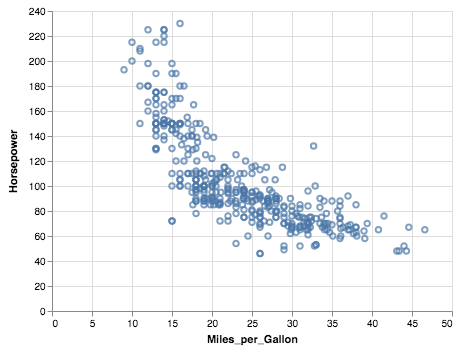

In [9]:
# Save chart to display in publications

alt.Chart(cars).mark_point().encode(
    x = 'Miles_per_Gallon',
    y = 'Horsepower'
).interactive()

### Altair Chart Types

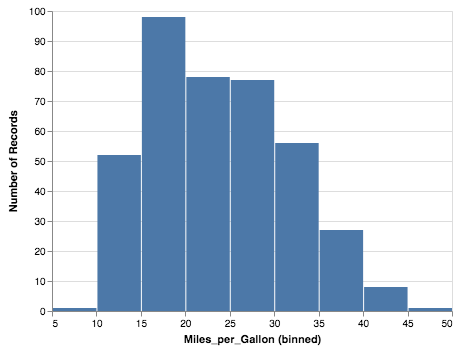

In [10]:
# Displaying data with bars and distributions

alt.Chart(cars).mark_bar().encode(
    x = alt.X('Miles_per_Gallon', bin=True),
    y = 'count()'
)

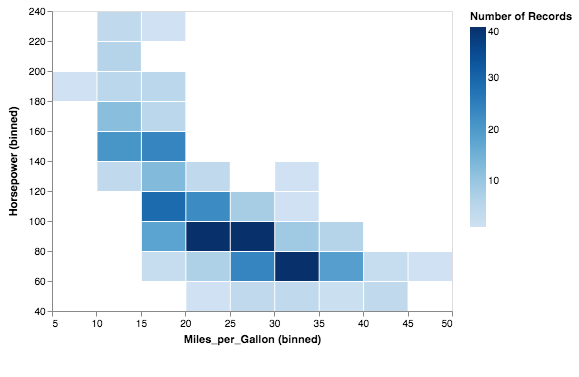

In [11]:
# Produce a 2-D histogram by using two y values

alt.Chart(cars).mark_bar().encode(
    x = alt.X('Miles_per_Gallon', bin=True),
    y = alt.Y('Horsepower', bin=True),
    color = 'count()'
)

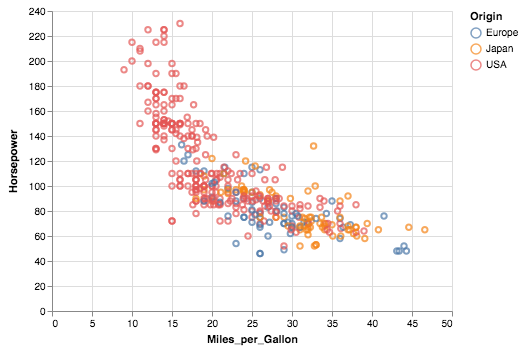

In [12]:
# Selection example to create interactive features

interval = alt.selection_interval() 


alt.Chart(cars).mark_point().encode(
    x = 'Miles_per_Gallon',
    y = 'Horsepower',
    color = 'Origin'
).properties(
    selection = interval
)

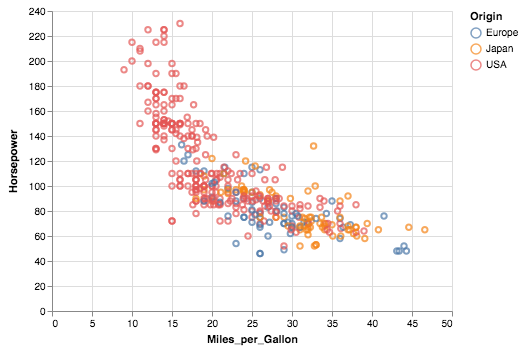

In [13]:
# Selection example to create interactive features along x axis

interval = alt.selection_interval(encodings=['x']) 


alt.Chart(cars).mark_point().encode(
    x = 'Miles_per_Gallon',
    y = 'Horsepower',
    color = 'Origin'
).properties(
    selection = interval
)

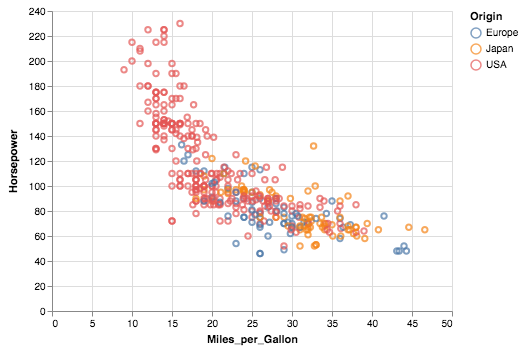

In [14]:
# Selection example to create interactive features along y axis

interval = alt.selection_interval(encodings=['y']) 


alt.Chart(cars).mark_point().encode(
    x = 'Miles_per_Gallon',
    y = 'Horsepower',
    color = 'Origin'
).properties(
    selection = interval
)

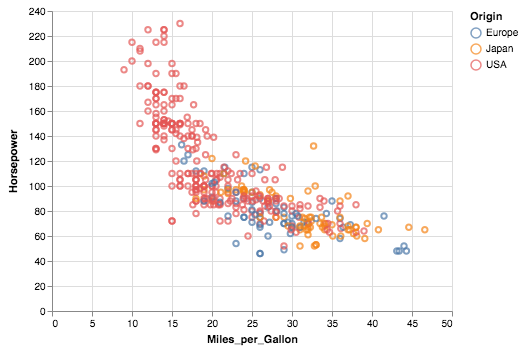

In [15]:
# Selection example to create interactive features along both axises

interval = alt.selection_interval(encodings=['y', 'x']) 


# Add conditional elements to gray out areas outside of selection via 'alt.condition()'

# interval -> selection area
# 'Origin' -> color of selection area
# alt.value('lightgray') -> color of unselected area

alt.Chart(cars).mark_point().encode(
    x = 'Miles_per_Gallon',
    y = 'Horsepower',
    color = alt.condition(interval, 'Origin', alt.value('lightgray'))
).properties(
    selection = interval
)

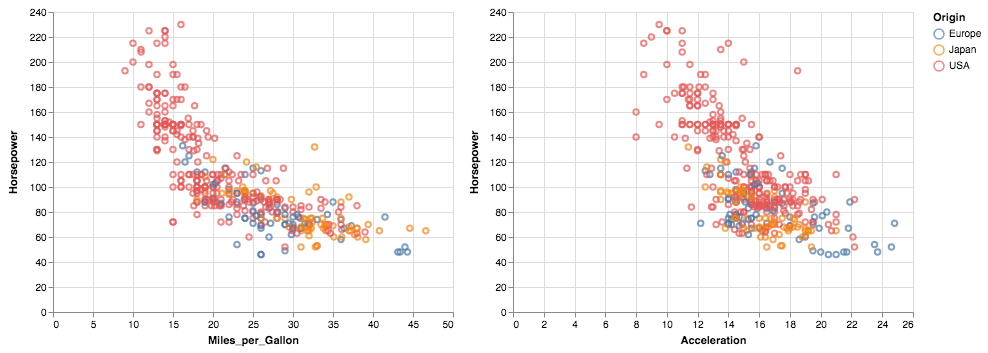

In [16]:
# Create multi panel charts

interval = alt.selection_interval(encodings=['y', 'x']) 


# Add conditional elements to gray out areas outside of selection via 'alt.condition()'

# interval -> selection area
# 'Origin' -> color of selection area
# alt.value('lightgray') -> color of unselected area

chart = alt.Chart(cars).mark_point().encode(
    x = 'Miles_per_Gallon',
    y = 'Horsepower',
    color = alt.condition(interval, 'Origin', alt.value('lightgray'))
).properties(
    selection = interval
)

# Process to create multi panel chart

# the pipe creates side by side charts
chart | chart.encode(x='Acceleration')

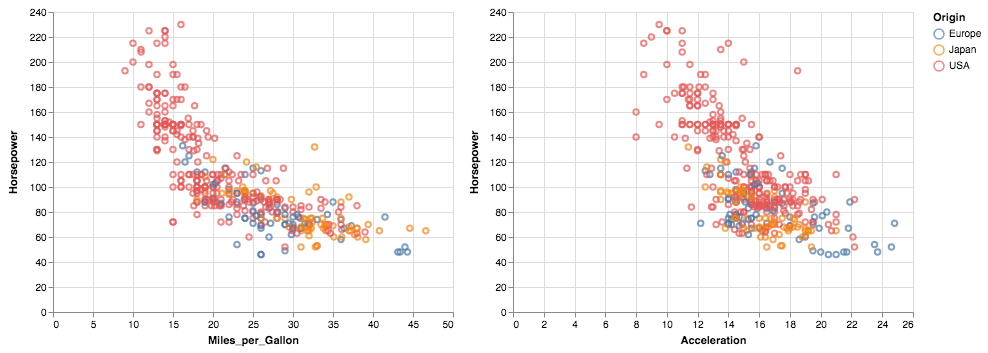

In [17]:
# Create multi panel charts focusing on the x coordinates

interval = alt.selection_interval(encodings=['x']) 


# Add conditional elements to gray out areas outside of selection via 'alt.condition()'
# interval -> selection area
# 'Origin' -> color of selection area
# alt.value('lightgray') -> color of unselected area

chart = alt.Chart(cars).mark_point().encode(
    x = 'Miles_per_Gallon',
    y = 'Horsepower',
    color = alt.condition(interval, 'Origin', alt.value('lightgray'))
).properties(
    selection = interval
)

# Process to create multi panel chart

# the pipe creates side by side charts
chart | chart.encode(x='Acceleration')

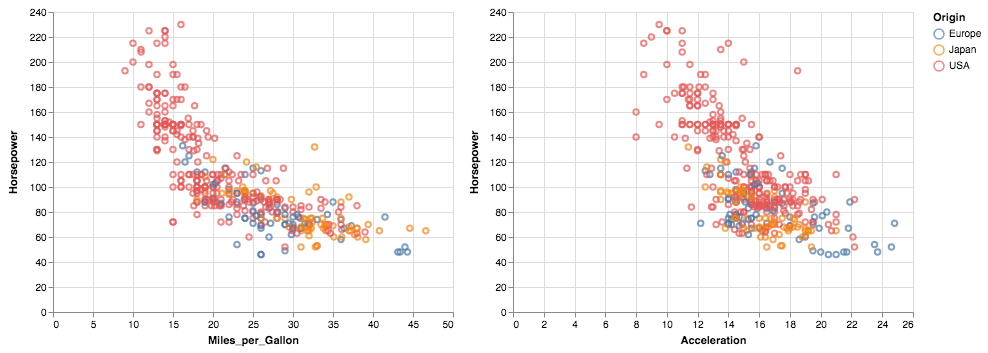

In [18]:
# Use tooltip to get name of data point***

interval = alt.selection_interval(encodings=['x']) 


# Add conditional elements to gray out areas outside of selection via 'alt.condition()'
# interval -> selection area
# 'Origin' -> color of selection area
# alt.value('lightgray') -> color of unselected area

chart = alt.Chart(cars).mark_point().encode(
    x = 'Miles_per_Gallon',
    y = 'Horsepower',
    color = alt.condition(interval, 'Origin', alt.value('lightgray')),
    tooltip = 'Name'
).properties(
    selection = interval
)

# Process to create multi panel chart

# the pipe creates side by side charts
chart | chart.encode(x='Acceleration')

In [19]:
# save as html file***

interval = alt.selection_interval(encodings=['x']) 


# Add conditional elements to gray out areas outside of selection via 'alt.condition()'
# interval -> selection area
# 'Origin' -> color of selection area
# alt.value('lightgray') -> color of unselected area

chart = alt.Chart(cars).mark_point().encode(
    x = 'Miles_per_Gallon',
    y = 'Horsepower',
    color = alt.condition(interval, 'Origin', alt.value('lightgray')),
    tooltip = 'Name'
).properties(
    selection = interval
)

# Process to create multi panel chart

# the pipe creates side by side charts
(chart | chart.encode(x='Acceleration')).save('mytest.html')

### Cool Examples with Selections

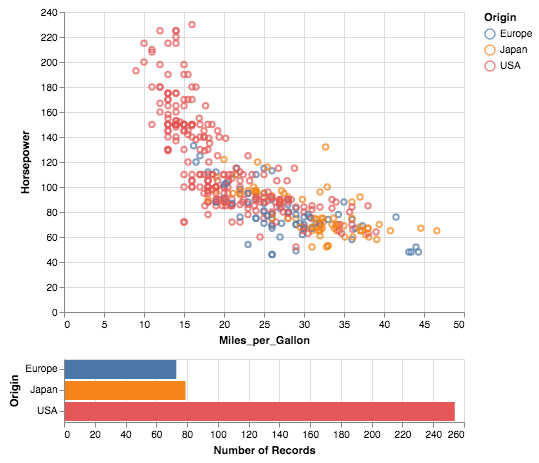

In [20]:
# Selection with figures stacked on top of one another

chart = alt.Chart(cars).mark_point().encode(
    x = 'Miles_per_Gallon',
    y = 'Horsepower',
    color = alt.condition(interval, 'Origin', alt.value('lightgray')),
    tooltip = 'Name'
).properties(
    selection = interval
)

hist = alt.Chart(cars).mark_bar().encode(
    x = 'count()',
    y = 'Origin',
    color = 'Origin'
)

# generate plot with '&' operator to place figures on top of one another
chart & hist

In [23]:
# Add .transform_filter() to limit the display based on the interval

chart = alt.Chart(cars).mark_point().encode(
    x = 'Miles_per_Gallon',
    y = 'Horsepower',
    color = alt.condition(interval, 'Origin', alt.value('lightgray')),
    tooltip = 'Name'
).properties(
    selection = interval
)

# Create histogram and filter by the interval selection via .transform_filter()
hist = alt.Chart(cars).mark_bar().encode(
    x = 'count()',
    y = 'Origin',
    color = 'Origin'
).transform_filter(
    interval
)

# generate plot with '&' operator to place figures on top of one another
(chart & hist).save('test.html')